In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/healthcare-dataset-stroke-data.csv')
data=pd.read_csv('/content/healthcare-dataset-stroke-data1.csv')

#Preprocessing of the dataset

In [ ]:
drop_features = ["id"]
data = data.drop(drop_features, axis=1)
data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [ ]:
data.shape

(5110, 11)

In [ ]:
data.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
#As we can observe in the above cell, bmi column have 201 missing values, thus to fill this missing values, we using knnImputer

In [ ]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors = 71)
data['bmi'] = imputer.fit_transform(data[['bmi']])

In [ ]:
data.isna().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [ ]:
data['stroke'].value_counts()[0]

4861

In [ ]:
data['stroke'].value_counts()[1]

249

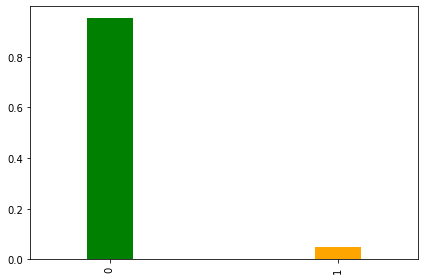

In [ ]:
fig, axes = plt.subplots(figsize=(6, 4))
data['stroke'].value_counts(normalize=True).plot.bar(width=0.2, color=('green','orange'))

plt.tight_layout()
plt.show()

In [ ]:
df=data

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.893237,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.000000,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.600000,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.600000,formerly smoked,0


In [ ]:
df.shape

(5110, 11)

##Encoding

In [ ]:
#encoding

In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['ever_married']= label_encoder.fit_transform(df['ever_married'])
df['work_type']= label_encoder.fit_transform(df['work_type'])
df['Residence_type']= label_encoder.fit_transform(df['Residence_type'])
df['smoking_status']= label_encoder.fit_transform(df['smoking_status'])

In [ ]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.600000,1,1
1,0,61.0,0,0,1,3,0,202.21,28.893237,2,1
2,1,80.0,0,1,1,2,0,105.92,32.500000,2,1
3,0,49.0,0,0,1,2,1,171.23,34.400000,3,1
4,0,79.0,1,0,1,3,0,174.12,24.000000,2,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,0,80.0,1,0,1,2,1,83.75,28.893237,2,0
5106,0,81.0,0,0,1,3,1,125.20,40.000000,2,0
5107,0,35.0,0,0,1,3,0,82.99,30.600000,2,0
5108,1,51.0,0,0,1,2,0,166.29,25.600000,1,0


##Spillting the dataset into train and test sets

In [ ]:
from sklearn.model_selection import train_test_split

X = df.iloc[:, 0:-1].values
Y = df.iloc[:, -1].values

X_train, X_test, Y_train,Y_test = train_test_split(X, Y, test_size=.3, random_state=15)

In [ ]:
Y

array([1, 1, 1, ..., 0, 0, 0])

#Visualization

In [ ]:
#visualizing the dataset

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Age: Stroke vs. No Stroke')

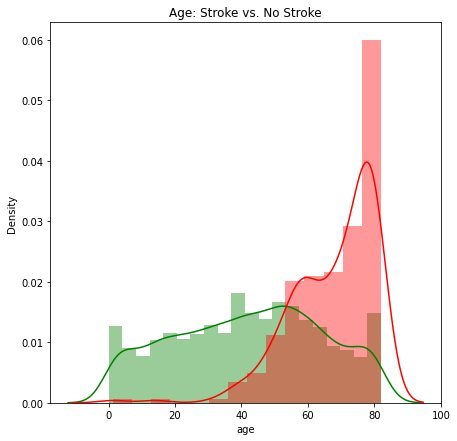

In [ ]:
plt.figure(figsize=(7,7))
sns.distplot(data[data['stroke'] == 0]['age'], color='green')
sns.distplot(data[data['stroke'] == 1]['age'], color='red')
plt.title('Age: Stroke vs. No Stroke')

In [ ]:
data['smoking_status'].unique()

array([1, 2, 3, 0])

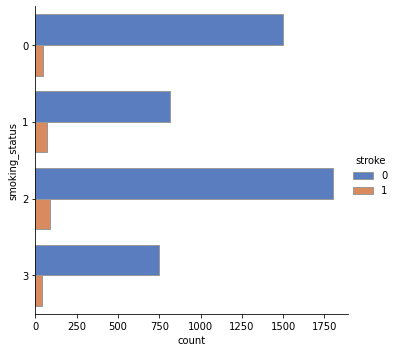

In [ ]:
# Smoking to Stroke
sns.catplot(y="smoking_status", hue="stroke", kind="count",palette="muted", edgecolor="0.6", data=data)
plt.show()

In [ ]:
data['gender'].unique()

array([1, 0, 2])

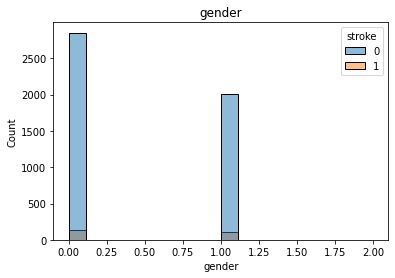

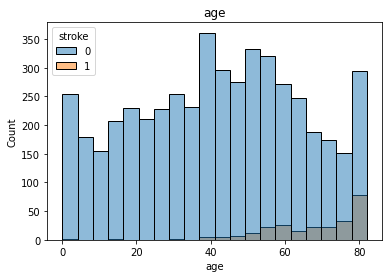

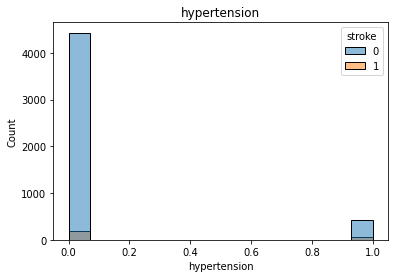

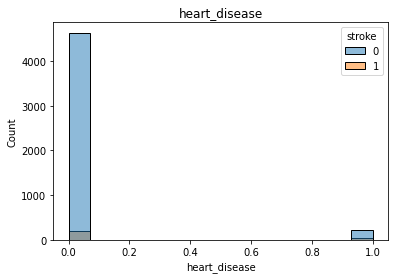

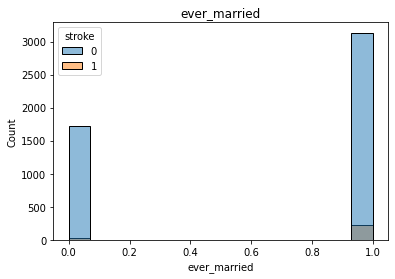

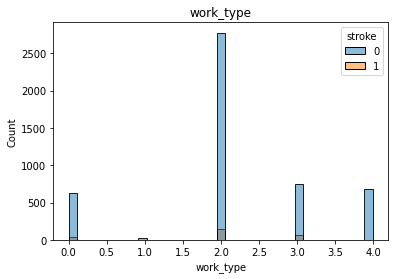

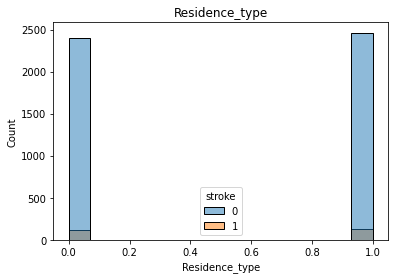

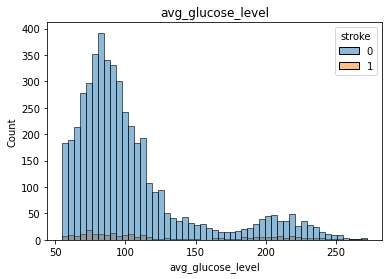

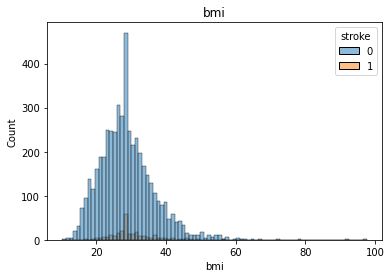

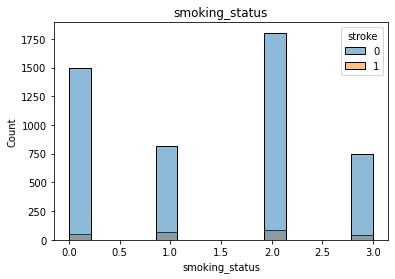

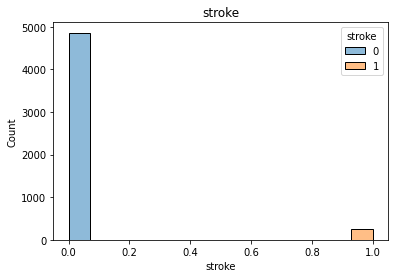

In [ ]:
for feature in df.columns:
    plt.title(feature)
    sns.histplot(data = df , x = feature , hue = 'stroke')
    plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


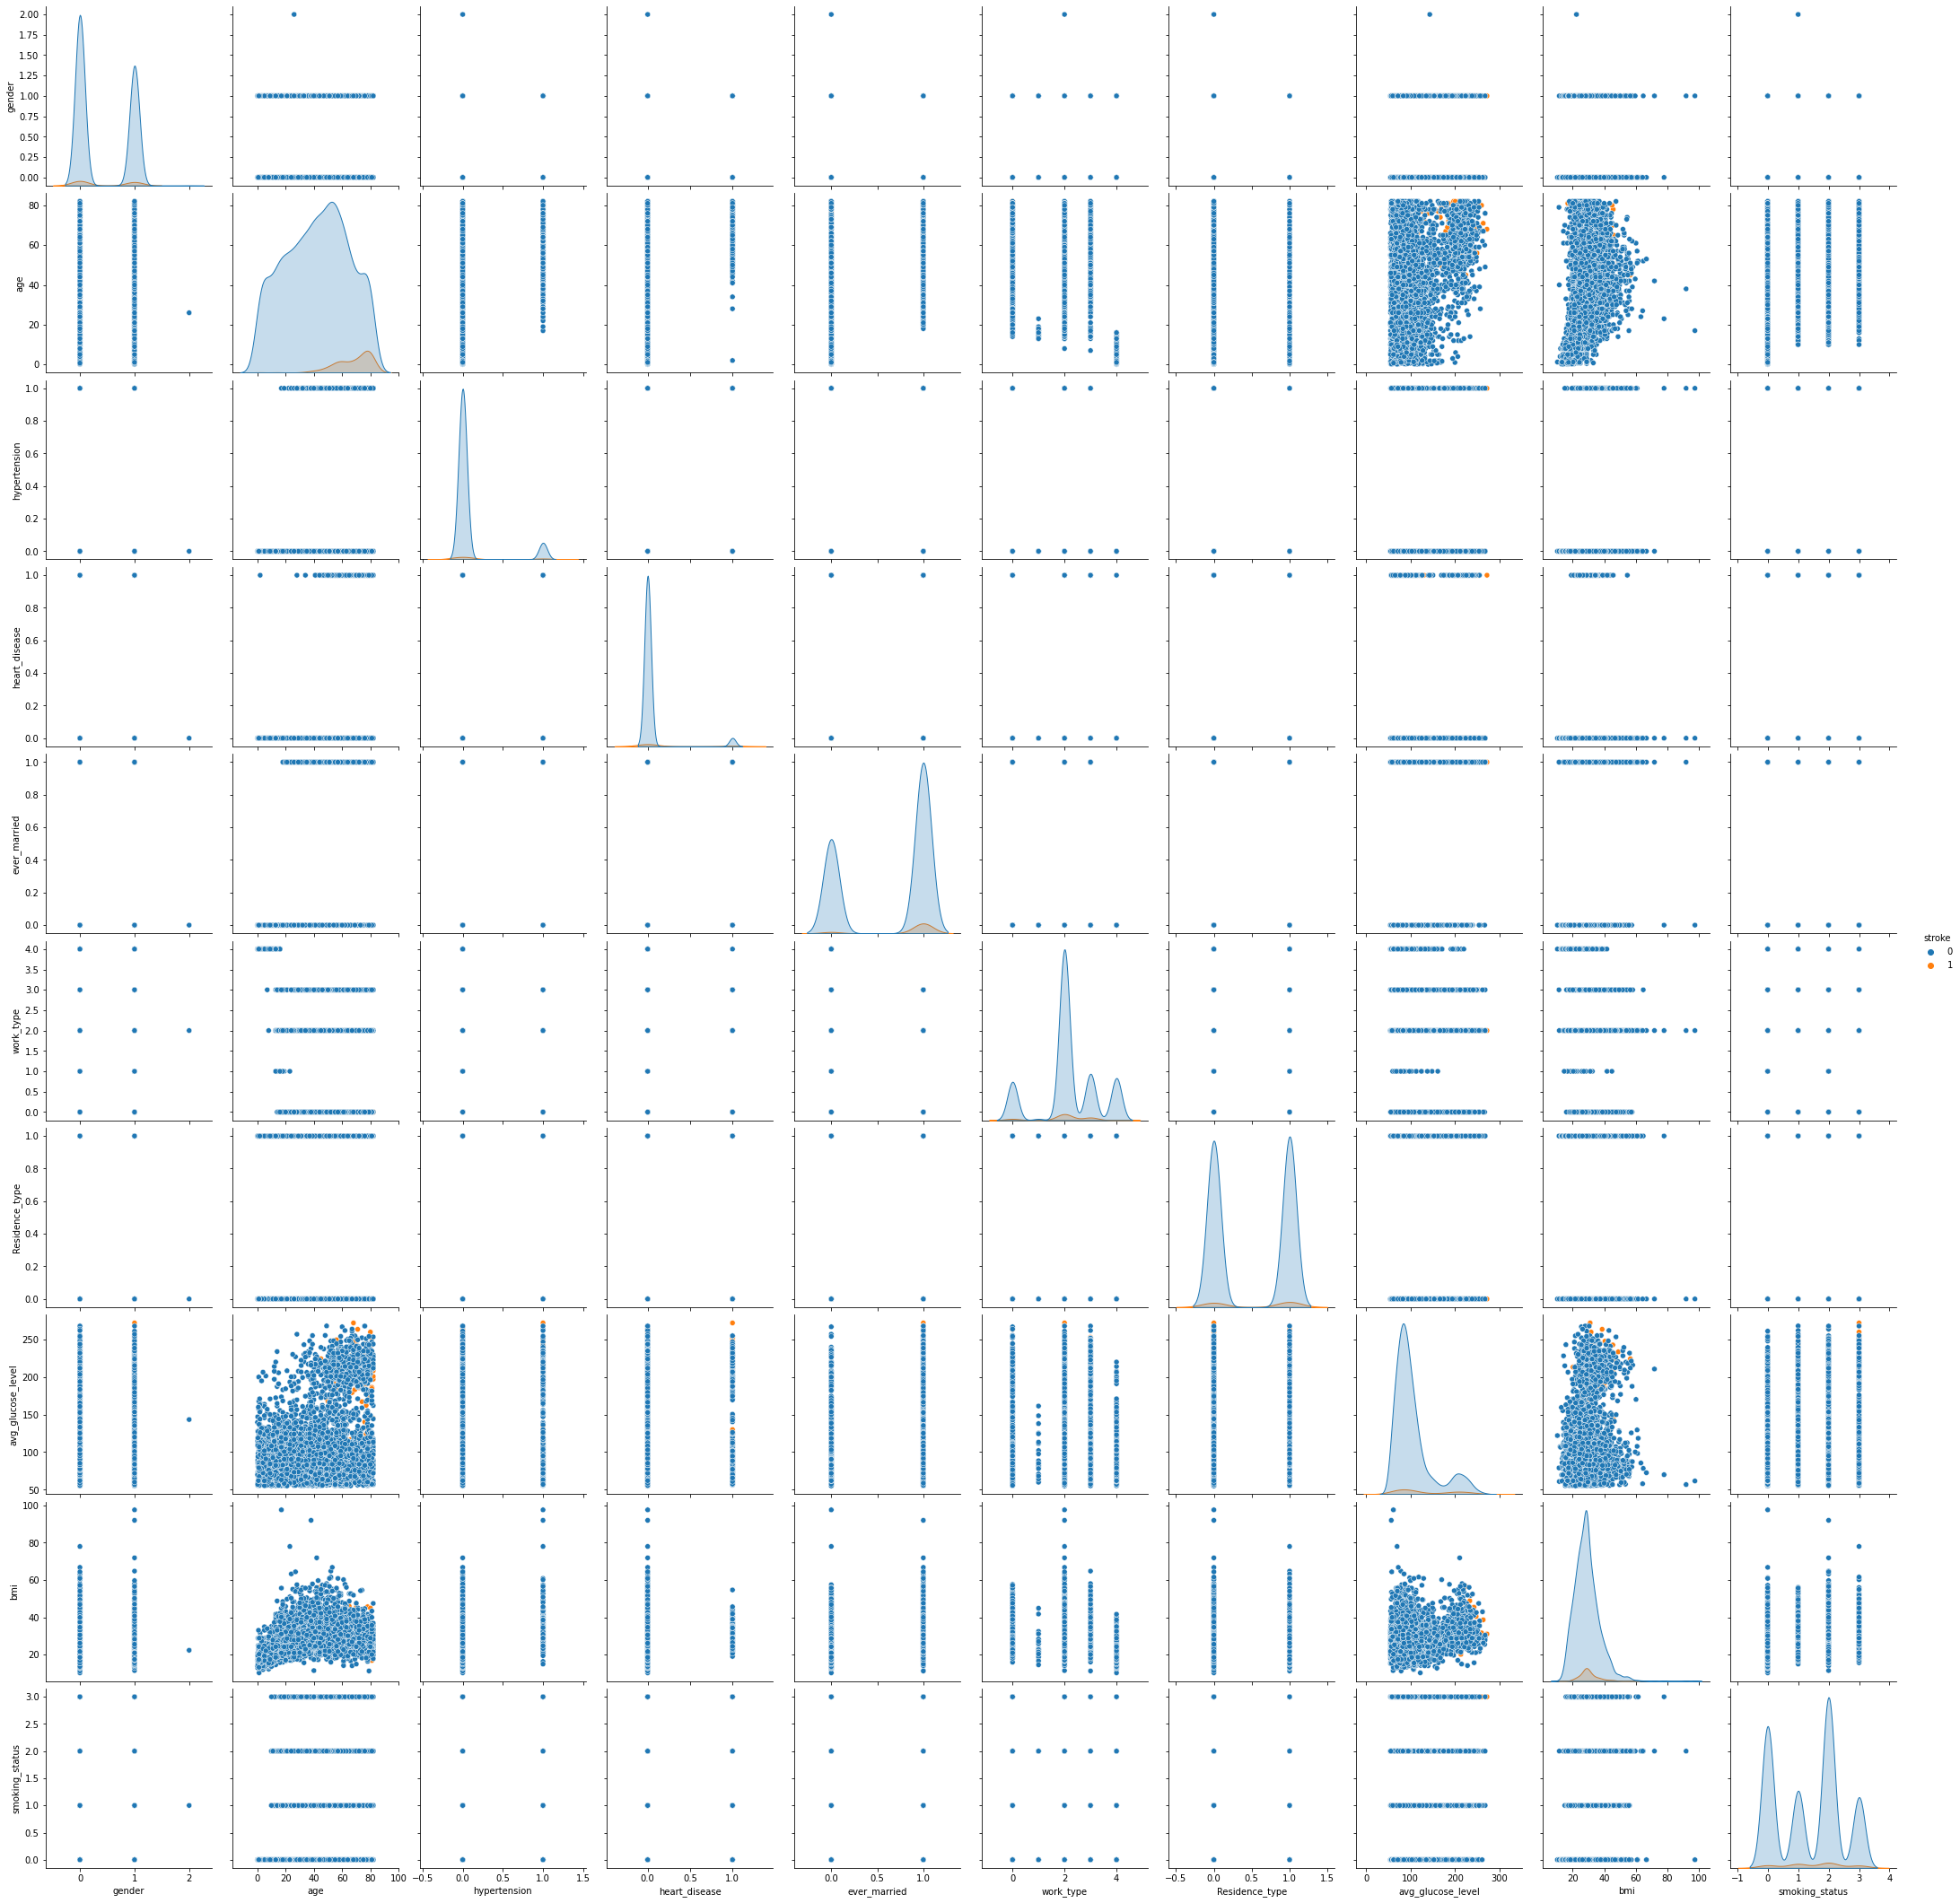

In [ ]:
sns.pairplot(df, hue="stroke", size=3);
plt.show()

#As target column have classes imbalanced, thus in order to balance then we are using here smote

In [ ]:
#using smote
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 2)
X_train1, Y_train1 = sm.fit_resample(X, Y.ravel())

#Training and testing the various models

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
LGR = LogisticRegression(random_state=0)
LGR.fit(X_train1, Y_train1.ravel())
pred_LGR=LGR.predict(X_train1)
print('training acuracy for LogisticRegression model =',accuracy_score(Y_train1,pred_LGR))
print()
LGR1 = LogisticRegression(random_state=0)
LGR1.fit(X_train1, Y_train1.ravel())
pred_LGR1=LGR1.predict(X_test)
print('testing acuracy for LogisticRegression model =',accuracy_score(Y_test,pred_LGR1))

training acuracy for LogisticRegression model = 0.7676404032092162

testing acuracy for LogisticRegression model = 0.7423352902804957


In [ ]:
dtc = DecisionTreeClassifier(max_depth=22)
dtc.fit(X_train1,Y_train1)
pred11=dtc.predict(X_train1)
print(' training acuracy for DecisionTreeClassifier model',accuracy_score(Y_train1,pred11))
print()
dtc1 = DecisionTreeClassifier(max_depth=22)
dtc1.fit(X_train1,Y_train1.ravel())
pred112=dtc1.predict(X_test)
print(' testing acuracy for DecisionTreeClassifier model =',accuracy_score(Y_test,pred112))

 training acuracy for DecisionTreeClassifier model 0.9997942810121374

 testing acuracy for DecisionTreeClassifier model = 0.9986953685583823


In [ ]:
lgbm = LGBMClassifier(n_estimators=2000, eta=0.5,max_depth=3)
lgbm.fit(X_train1,Y_train1.ravel())
pred4=lgbm.predict(X_train1)
print(' training acuracy for lightgbm model =',accuracy_score(Y_train1,pred4))
print()
lgbm1 = LGBMClassifier(n_estimators=2000, eta=0.5,max_depth=3)
lgbm1.fit(X_train1,Y_train1.ravel())
pred2=lgbm1.predict(X_test)
print(' testing acuracy for lightgbm model =',accuracy_score(Y_test,pred2))

 training acuracy for lightgbm model = 0.9988685455667559

 testing acuracy for lightgbm model = 0.9986953685583823


In [ ]:
rfc = RandomForestClassifier(n_estimators=700,max_depth=10)
rfc.fit(X_train1,Y_train1.ravel())
pred4=rfc.predict(X_train1)
print(' training acuracy for RandomForestClassifier =',accuracy_score(Y_train1,pred4))
print()
rfc1 = RandomForestClassifier(n_estimators=700,max_depth=10)
rfc1.fit(X_train1,Y_train1.ravel())
pred4=rfc1.predict(X_test)
print(' testing acuracy for RandomForestClassifier =',accuracy_score(Y_test,pred4))

 training acuracy for RandomForestClassifier = 0.9767537543715284

 testing acuracy for RandomForestClassifier = 0.9680365296803652


In [ ]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train1,Y_train1.ravel())
pred5=knn.predict(X_train1)
print(' testing acuracy for KNeighborsClassifier =',accuracy_score(Y_train1,pred5))
print()
knn1 = KNeighborsClassifier(n_neighbors=3)
knn1.fit(X_train1,Y_train1.ravel())
pred05=knn1.predict(X_test)
print(' testing acuracy for KNeighborsClassifier =',accuracy_score(Y_test,pred05))

 testing acuracy for KNeighborsClassifier = 0.9415758074470274

 testing acuracy for KNeighborsClassifier = 0.8988910632746249


In [ ]:
Svc = svm.SVC()
Svc.fit(X_train1,Y_train1.ravel())
pred3=Svc.predict(X_train1)
print('acuracy for SVM =',accuracy_score(Y_train1,pred3))
print()
Svc1 = svm.SVC()
Svc1.fit(X_train1,Y_train1.ravel())
pred03=Svc1.predict(X_test)
print('acuracy for SVM =',accuracy_score(Y_test,pred03))

acuracy for SVM = 0.7673318247274223

acuracy for SVM = 0.7058056099151989


In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp.fit(X_train1,Y_train1.ravel())
pred55=mlp.predict(X_train1)
print(' training acuracy for MLP =',accuracy_score(Y_train1,pred55))
print()
mlp1 = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000)
mlp1.fit(X_train1,Y_train1.ravel())
pred66=mlp1.predict(X_test)
print(' testing acuracy for MLP =',accuracy_score(Y_test,pred66))

 training acuracy for MLP = 0.7768977576630323

 testing acuracy for MLP = 0.7279843444227005


In [ ]:
gdb = RandomForestClassifier(n_estimators=700,max_depth=10)
gdb.fit(X_train1,Y_train1.ravel())
pred77=gdb.predict(X_train1)
print(' training acuracy for Gradient Boosting =',accuracy_score(Y_train1,pred77))
print()
gdb1 = GradientBoostingClassifier(n_estimators=2000, learning_rate=0.1,max_depth=1, random_state=0)
gdb1.fit(X_train1,Y_train1.ravel())
pred88=gdb1.predict(X_test)
print(' testing acuracy for Gradient Boosting =',accuracy_score(Y_test,pred88))

 training acuracy for Gradient Boosting = 0.9760337379140095

 testing acuracy for Gradient Boosting = 0.9517286366601435


In [ ]:
# observing training and testing accuracies of various above models we can say that there is no overfit condition.

#Plotting ROC curve to compare the models

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
probs_LGR = LGR1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_LGR = roc_auc_score(Y_test, probs_LGR)
fpr_LGR, tpr_LGR, thresholds_LGR = roc_curve(Y_test, probs_LGR)

probs_dtc = dtc1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_dtc = roc_auc_score(Y_test, probs_dtc)
fpr_dtc, tpr_dtc, thresholds_dtc = roc_curve(Y_test, probs_dtc)

probs_lgbm = lgbm1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_lgbm = roc_auc_score(Y_test, probs_lgbm)
fpr_lgbm, tpr_lgbm, thresholds_lgbm = roc_curve(Y_test, probs_lgbm)

probs_rfc = rfc1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_rfc = roc_auc_score(Y_test, probs_rfc)
fpr_rfc, tpr_rfc, thresholds_rfc = roc_curve(Y_test, probs_rfc)

probs_knn = knn1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_knn = roc_auc_score(Y_test, probs_knn)
fpr_knn, tpr_knn, thresholds_knn = roc_curve(Y_test, probs_knn)

probs_mlp = mlp1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_mlp = roc_auc_score(Y_test, probs_mlp)
fpr_mlp, tpr_mlp, thresholds_mlp = roc_curve(Y_test, probs_mlp)

probs_gdb = gdb1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
auc_gdb = roc_auc_score(Y_test, probs_gdb)
fpr_gdb, tpr_gdb, thresholds_gdb = roc_curve(Y_test, probs_gdb)

#probs_Svc = Svc1.fit(X_train1, Y_train1.ravel()).predict_proba(X_test)[:, 1]
#auc_Svc = roc_auc_score(Y_test, probs_Svc)
#fpr_Svc, tpr_Svc, thresholds_Svc = roc_curve(Y_test, probs_Svc)

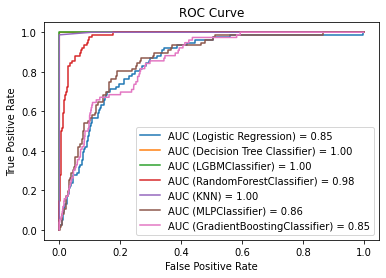

In [ ]:
plt.plot(fpr_LGR, tpr_LGR, label=f'AUC (Logistic Regression) = {auc_LGR:.2f}')
plt.plot(fpr_dtc, tpr_dtc, label=f'AUC (Decision Tree Classifier) = {auc_dtc:.2f}')
plt.plot(fpr_lgbm, tpr_lgbm, label=f'AUC (LGBMClassifier) = {auc_lgbm:.2f}')
plt.plot(fpr_rfc, tpr_rfc, label=f'AUC (RandomForestClassifier) = {auc_rfc:.2f}')
plt.plot(fpr_knn, tpr_knn, label=f'AUC (KNN) = {auc_knn:.2f}')
plt.plot(fpr_mlp, tpr_mlp, label=f'AUC (MLPClassifier) = {auc_mlp:.2f}')
plt.plot(fpr_gdb, tpr_gdb, label=f'AUC (GradientBoostingClassifier) = {auc_gdb:.2f}')
# plt.plot(fpr_Svc, tpr_Svc, label=f'AUC (RandomForestClassifier) = {auc_Svc:.2f}')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend();

#Creating pipeline and testing the various models

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
pipeline_lr=Pipeline([('scalar1',StandardScaler()),('lr_classifier',LogisticRegression(random_state=0))])

pipeline_dt=Pipeline([('scalar2',StandardScaler()),('dt_classifier',DecisionTreeClassifier(max_depth=22))])

pipeline_randomforest=Pipeline([('scalar3',StandardScaler()),('rf_classifier',RandomForestClassifier(n_estimators=700,max_depth=10))])

pipeline_lgbm=Pipeline([('scalar4',StandardScaler()),('lgbm_classifier',LGBMClassifier(n_estimators=2000, eta=0.5,max_depth=3))])

pipeline_knn=Pipeline([('scalar5',StandardScaler()),('knn_model',KNeighborsClassifier(n_neighbors=3))])

pipeline_svc=Pipeline([('scalar6',StandardScaler()),('svc_model',svm.SVC())])

pipeline_mlpClassifier=Pipeline([('scalar7',StandardScaler()),('mlp_regressor',MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=5000))])

pipeline_gradient_boosting_classsifier=Pipeline([('scalar8',StandardScaler()),('gradient_boosting_regressor',GradientBoostingClassifier(n_estimators=2000, learning_rate=0.1,max_depth=1, random_state=0))])

In [ ]:
## Lets make the list of pipelines
pipelines = [pipeline_lr, pipeline_dt, pipeline_randomforest,pipeline_lgbm, pipeline_knn, pipeline_svc,pipeline_mlpClassifier,pipeline_gradient_boosting_classsifier]

In [ ]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [ ]:
# Dictionary of pipelines and classifier types for ease of reference
pipe_dict = {1: 'Logistic Regression', 2: 'Decision Tree', 3: 'RandomForest', 4: 'Lightgbm', 5: 'KNN', 6: 'SVM',7: 'MLP', 8: 'Gradient Boosting'}

# Fit the pipelines
for pipe in pipelines:
	pipe.fit(X_train1, Y_train1)

In [ ]:
for i in pipe_dict:
  print(pipe_dict[i])

Logistic Regression
Decision Tree
RandomForest
Lightgbm
KNN
SVM
MLP
Gradient Boosting


In [ ]:
l1=[]
for i,model in zip(pipe_dict,pipelines):
  l1.append(model.score(X_test,Y_test))
  print("Test Accuracy:",pipe_dict[i],'=',model.score(X_test,Y_test))

Test Accuracy: Logistic Regression = 0.7442922374429224
Test Accuracy: Decision Tree = 0.9986953685583823
Test Accuracy: RandomForest = 0.9647749510763209
Test Accuracy: Lightgbm = 0.9980430528375733
Test Accuracy: KNN = 0.9536855838225701
Test Accuracy: SVM = 0.918460534898891
Test Accuracy: MLP = 0.9060665362035225
Test Accuracy: Gradient Boosting = 0.9517286366601435


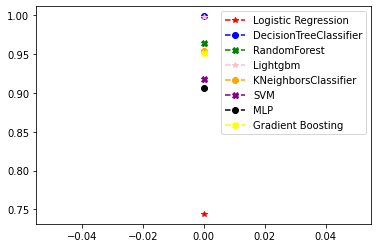

In [ ]:
plt.plot(l1[0],'--*',color='red')
plt.plot(l1[1],'--o',color='blue')
plt.plot(l1[2],'--X',color='green')
plt.plot(l1[3],'--*',color='pink')
plt.plot(l1[4],'--o',color='orange')
plt.plot(l1[5],'--X',color='purple')
plt.plot(l1[6],'--o',color='black')
plt.plot(l1[7],'--X',color='yellow')
plt.legend(['Logistic Regression','DecisionTreeClassifier','RandomForest','Lightgbm','KNeighborsClassifier','SVM','MLP','Gradient Boosting'])

In [ ]:
for i,model in zip(pipe_dict,pipelines):
    if model.score(X_test,Y_test)>best_accuracy:
        best_accuracy=model.score(X_test,Y_test)
        best_pipeline=model
        best_classifier=i
print('Classifier with best accuracy : {}'.format(pipe_dict[best_classifier]),'-----> with accuracy = ',best_accuracy)

Classifier with best accuracy : Decision Tree -----> with accuracy =  0.9986953685583823
